In [36]:
import cptac
import cptac.utils as u
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
en = cptac.Endometrial()
col = cptac.Colon()
br = cptac.Brca()

In [15]:
gene = 'PIK3CA'

In [4]:
#Prioritize hotspot mutations
endo = en.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [43]:
#pull out all the missense mutation and wildtype tumors 
missense = endo.loc[(endo['Mutation'] == "Missense_Mutation") | (endo['Mutation'] == "Wildtype_Tumor")]

# Now look at the cis effect for endometrial cancer 
(that is the difference in missense mutation between wildtype_tumor and missense_mutation)

In [28]:
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])
prot = en.get_proteomics() #get proteomic data
missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
C3L-00006,Missense_Mutation,-0.4500
C3L-00008,Wildtype_Tumor,-0.2150
C3L-00032,Missense_Mutation,-0.1780
C3L-00090,Wildtype_Tumor,-0.3920
C3L-00136,Wildtype_Tumor,-0.3490
...,...,...
C3N-01510,Missense_Mutation,-0.3730
C3N-01520,Missense_Mutation,-0.4860
C3N-01537,Wildtype_Tumor,-0.0312


In [32]:
u.wrap_ttest(missense, "Mutation", [gene+"_proteomics"], return_all=True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.201595


In [38]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")



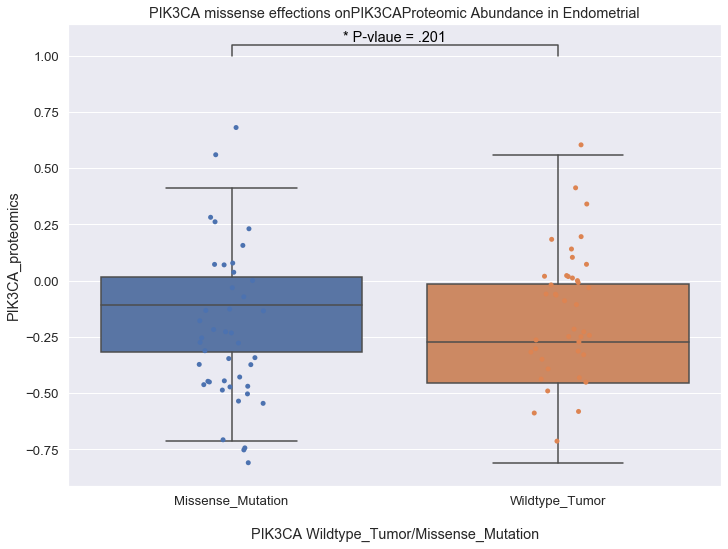

In [40]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on" + gene + "Proteomic Abundance in Endometrial")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+"_proteomics")

format_pval_annotation('* P-vlaue = .201', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# Cis effects for BRCA

In [42]:
#Prioritize hotspot mutations
brca = br.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [44]:
#pull out all the missense mutation and wildtype tumors 
brca_missense = brca.loc[(brca['Mutation'] == "Missense_Mutation") | (brca['Mutation'] == "Wildtype_Tumor")]

In [45]:
#drop everything but the mutation column and join to proteomic data
brca_missense = brca_missense.drop(columns=['Location', 'Mutation_Status'])
prot = br.get_proteomics() #get proteomic data
brca_missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
brca_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
CPT001846,Missense_Mutation,0.6245
X01BR001,Wildtype_Tumor,-0.6810
X01BR008,Wildtype_Tumor,-0.9478
X01BR020,Wildtype_Tumor,-0.8300
X01BR023,Wildtype_Tumor,0.5457
...,...,...
X20BR008,Missense_Mutation,0.4727
X21BR002,Missense_Mutation,0.3150
X21BR010,Missense_Mutation,0.1131


In [46]:
u.wrap_ttest(brca_missense, "Mutation", [gene+"_proteomics"], return_all=True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.689518


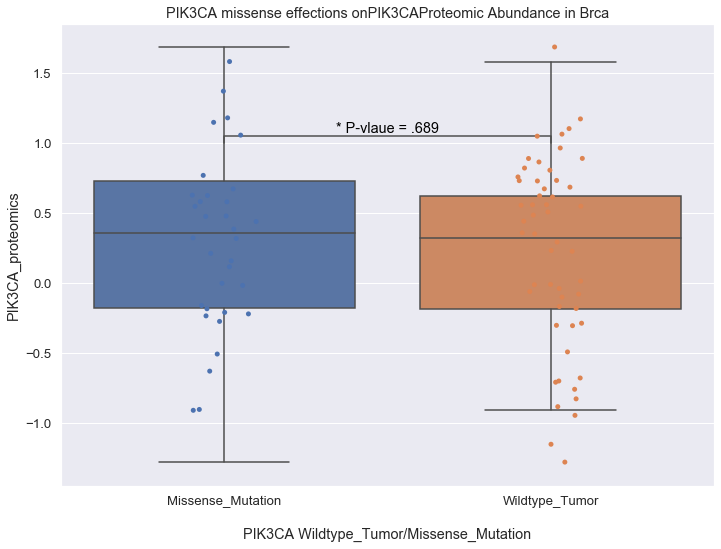

In [47]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=brca_missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on" + gene + "Proteomic Abundance in Brca")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=brca_missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+"_proteomics")

format_pval_annotation('* P-vlaue = .689', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# Cis effect for Colon

In [48]:
#Prioritize hotspot mutations
colon = col.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [57]:
colon['Mutation'].unique()

array(['Wildtype_Tumor', 'Amplification', 'nonframeshift substitution',
       'nonsynonymous SNV', 'Deletion', 'nonsynonymous SNV_hotspot',
       'frameshift substitution'], dtype=object)

In [59]:
#pull out all the missense mutation and wildtype tumors 
colon_missense = colon.loc[(colon['Mutation'] == "nonsynonymous SNV") | (colon['Mutation'] == "Wildtype_Tumor")]

In [60]:
#drop everything but the mutation column and join to proteomic data
colon_missense = colon_missense.drop(columns=['Location', 'Mutation_Status'])
prot = col.get_proteomics() #get proteomic data
colon_missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
colon_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
01CO001,Wildtype_Tumor,NaN
01CO005,Wildtype_Tumor,NaN
01CO006,Wildtype_Tumor,-0.515
01CO013,Wildtype_Tumor,0.106
01CO015,Wildtype_Tumor,-0.687
...,...,...
20CO007,nonsynonymous SNV,-0.245
22CO004,Wildtype_Tumor,-0.817
22CO006,Wildtype_Tumor,0.177


In [61]:
u.wrap_ttest(colon_missense, "Mutation", [gene+"_proteomics"], return_all=True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.31414


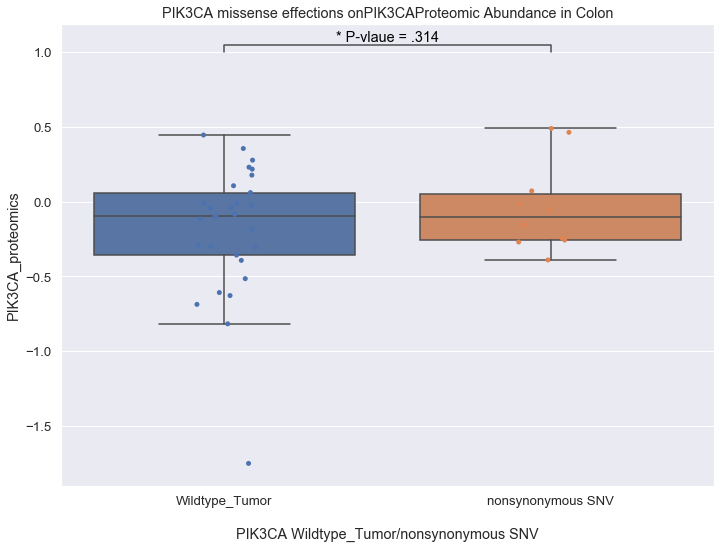

In [63]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'nonsynonymous SNV'],
                     data=colon_missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on" + gene + "Proteomic Abundance in Colon")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=colon_missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/nonsynonymous SNV", ylabel=gene+"_proteomics")

format_pval_annotation('* P-vlaue = .314', 0, 1, 1)

plt.show()
plt.clf()
plt.close()